In [1]:
# uniquement pour utliser dans colab : 

# !git clone https://github.com/CarinePivoteau/Alea2023Notebooks.git
# import sys
# sys.path.append('/content/Alea2023Notebooks')

In [2]:
# si les modules ne sont pas installés :

# import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install graphviz

In [3]:
# imports : random, time, math, sys, plt, graphviz

from helpers import *

In [4]:
def random_binary_tree_BGW_free(maxi):
    size = 0
    def random_BGW():
        nonlocal size # compteur global
        size += 1
        if size > maxi:
            raise Exception("Too large")
        left = random_BGW() if flip_a_coin() else []
        right = random_BGW() if flip_a_coin() else []    
        return ['z', left, right]
    try:
        return random_BGW(), size
    except Exception as err:
        #print(err)
        return None, 0

In [5]:
t,s = random_binary_tree_BGW_free(100)
print(t,s)

['z', ['z', [], []], ['z', [], ['z', ['z', [], ['z', [], ['z', ['z', ['z', ['z', ['z', [], []], []], ['z', [], []]], ['z', [], []]], ['z', ['z', ['z', ['z', ['z', ['z', [], []], []], []], ['z', ['z', [], []], ['z', [], ['z', [], ['z', [], ['z', [], ['z', [], []]]]]]]], ['z', ['z', ['z', [], ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', ['z', [], ['z', [], []]], []], []]], []], ['z', [], []]], []], ['z', [], ['z', [], []]]], ['z', [], ['z', [], []]]]], ['z', [], []]]], ['z', [], ['z', ['z', [], ['z', [], []]], []]]], []]], ['z', ['z', [], []], ['z', ['z', [], []], []]]]]]], []]]] 55


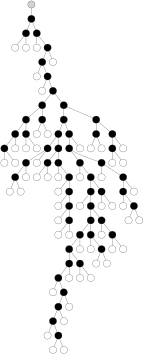

In [6]:
draw_tree_unlabelled(t,5,5)

In [7]:
def random_binary_tree_BGW(n): # engendre un arbre de taille n
    nb_trials, size_trials = 0, 0
    while True :
        t,s = random_binary_tree_BGW_free(n)
        nb_trials += 1
        size_trials += s
        if s == n:
            return nb_trials, size_trials, t

def random_binary_tree_BGW_approx(mini, maxi): # engendre un arbre de taille comprise entre mini et maxi
    nb_trials, size_trials = 0, 0
    while True :
        t,s = random_binary_tree_BGW_free(maxi)
        nb_trials += 1
        size_trials += s
        if mini <= s <= maxi:
            print()
            return nb_trials, size_trials, t, s
        
        if nb_trials % 100 == 0 : print(".", end = "")
        

In [8]:
print(random_binary_tree_BGW(100))

(1467, 13370, ['z', [], ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', [], ['z', ['z', [], []], []]]], []], ['z', ['z', ['z', ['z', [], ['z', ['z', [], []], []]], []], []], ['z', ['z', ['z', ['z', [], []], ['z', ['z', ['z', [], []], ['z', [], ['z', ['z', [], ['z', ['z', [], []], ['z', [], ['z', [], ['z', [], []]]]]], ['z', [], []]]]], []]], ['z', ['z', ['z', [], []], ['z', [], []]], []]], ['z', [], []]]]], ['z', ['z', ['z', ['z', [], []], ['z', ['z', [], []], []]], ['z', ['z', ['z', ['z', [], []], []], []], ['z', ['z', [], ['z', [], []]], ['z', ['z', ['z', [], ['z', [], ['z', ['z', ['z', [], []], []], ['z', ['z', [], []], ['z', [], []]]]]], ['z', [], []]], ['z', ['z', [], ['z', ['z', [], ['z', [], []]], []]], ['z', ['z', [], []], ['z', [], ['z', [], ['z', [], []]]]]]]]]], []]], ['z', ['z', ['z', ['z', ['z', [], []], []], ['z', [], ['z', [], ['z', [], ['z', [], ['z', ['z', ['z', ['z', [], ['z', [], ['z', ['z', [], []], []]]], []], []], ['z', [], []]]]]]]], []], ['z'

In [9]:
print(random_binary_tree_BGW_approx(90,110))

.
(190, 2338, ['z', [], ['z', [], ['z', ['z', ['z', [], []], ['z', [], ['z', ['z', ['z', ['z', [], []], ['z', [], []]], []], []]]], ['z', ['z', [], ['z', ['z', [], ['z', ['z', ['z', [], ['z', ['z', [], []], []]], ['z', ['z', ['z', [], []], []], ['z', ['z', [], []], []]]], []]], ['z', ['z', ['z', ['z', [], ['z', [], ['z', [], ['z', [], []]]]], []], ['z', ['z', ['z', ['z', ['z', [], ['z', [], []]], ['z', [], []]], []], []], ['z', ['z', [], ['z', [], []]], ['z', [], ['z', ['z', [], []], ['z', ['z', ['z', ['z', [], ['z', ['z', [], []], []]], ['z', ['z', ['z', [], ['z', ['z', [], []], []]], ['z', ['z', [], ['z', ['z', ['z', ['z', ['z', [], []], []], ['z', ['z', ['z', [], ['z', [], []]], []], ['z', ['z', ['z', [], ['z', [], ['z', ['z', [], ['z', [], []]], ['z', [], []]]]], ['z', [], []]], []]]], []], []]], []]], ['z', [], []]]], ['z', ['z', ['z', [], ['z', ['z', ['z', [], []], []], ['z', ['z', [], ['z', [], []]], ['z', ['z', ['z', [], []], []], []]]]], []], []]], ['z', ['z', ['z', [], []], [

In [10]:
c = count_occurences(lambda : random_binary_tree_BGW(3)[2],100000)

nb: 5
['z', [], ['z', [], ['z', [], []]]] 20.07
['z', ['z', [], ['z', [], []]], []] 20.09
['z', ['z', ['z', [], []], []], []] 20.01
['z', ['z', [], []], ['z', [], []]] 19.96
['z', [], ['z', ['z', [], []], []]] 19.87


In [11]:
#plot_time(lambda i:random_binary_tree_BGW_approx(i-i/10,i+i/10), 2000, nb_steps=50, nb=100)

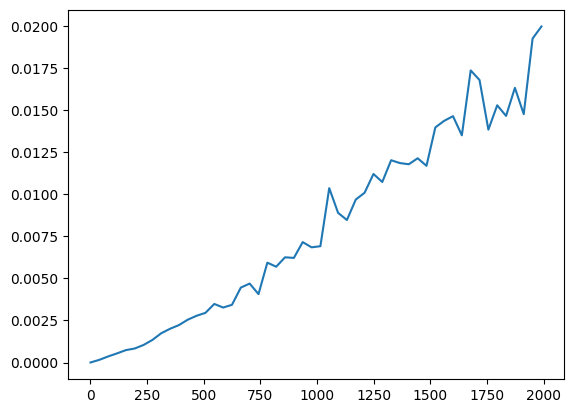

In [12]:
nb_trials,size_trials,t,size = random_binary_tree_BGW_approx(900,1_100)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
print(t)

..
nombre d'essais = 248, taille du rejet = 9085, taille de l'arbre = 998

['z', ['z', ['z', [], ['z', ['z', [], ['z', ['z', [], []], ['z', [], []]]], ['z', ['z', ['z', ['z', [], []], ['z', [], ['z', ['z', [], []], ['z', ['z', [], ['z', [], []]], ['z', ['z', [], ['z', [], []]], ['z', ['z', ['z', ['z', ['z', [], ['z', [], ['z', ['z', ['z', ['z', [], []], []], ['z', [], []]], []]]], []], ['z', ['z', [], ['z', ['z', [], []], []]], ['z', [], ['z', ['z', ['z', ['z', ['z', ['z', [], ['z', ['z', ['z', [], []], ['z', [], []]], ['z', [], []]]], []], []], ['z', [], ['z', ['z', ['z', ['z', [], ['z', ['z', [], ['z', [], []]], []]], []], ['z', ['z', ['z', [], ['z', [], ['z', ['z', [], ['z', [], []]], ['z', [], ['z', ['z', ['z', [], ['z', ['z', ['z', ['z', [], []], []], []], ['z', ['z', ['z', ['z', [], ['z', [], ['z', ['z', [], ['z', [], []]], ['z', ['z', [], []], ['z', [], []]]]]], ['z', [], []]], ['z', ['z', [], ['z', [], []]], ['z', ['z', ['z', ['z', [], ['z', ['z', [], ['z', ['z', ['z', [], ['z'

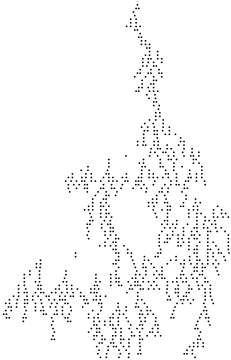

In [13]:
draw_tree_unlabelled(t,5,5)

In [14]:
nb_trials,size_trials,t,size = random_binary_tree_BGW_approx(9_000,11_000)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
#print(t)

.......
nombre d'essais = 740, taille du rejet = 79265, taille de l'arbre = 10461



In [15]:
# draw_tree_unlabelled(t,10,10)

In [16]:
t = time.time()
nb_trials,size_trials,_,size = random_binary_tree_BGW_approx(90_000,110_000)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
print(time.time() - t)


nombre d'essais = 35, taille du rejet = 111935, taille de l'arbre = 105030

0.08262181282043457


In [17]:
t = time.time()
nb_trials,size_trials,_,size = random_binary_tree_BGW_approx(900_000,1_100_000)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
print(time.time() - t)

.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
nombre d'essais = 83703, taille du rejet = 80676703, taille de l'arbre = 986748

126.4666998386383


In [18]:
t = time.time()
nb_trials,size_trials,_,size = random_binary_tree_BGW_approx(1_000_000,2_000_000)
print("nombre d'essais = {}, taille du rejet = {}, taille de l'arbre = {}\n".format(nb_trials,size_trials,size))
print(time.time() - t)

..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
nombre d'essais = 51090, taille du rejet = 48536934, taille de l'arbre = 1349063

105.67200303077698


In [19]:
def counts_max_and_average(gen,nb): # pour dessiner la distribution des tailles
    counts = []
    discard = 0
    for i in range(nb):
        size = gen()
        if size > 0:
            counts.append(size)
        else:
            discard +=1
    print("trop grands = {}, taille max = {}, moyenne des tailles = {}".format(discard, max(counts), sum(counts)/nb))
    return counts

In [20]:
n = 100_000
l = counts_max_and_average(lambda : random_binary_tree_BGW_free(1000)[1], n)

trop grands = 3579, taille max = 1000, moyenne des tailles = 34.0445


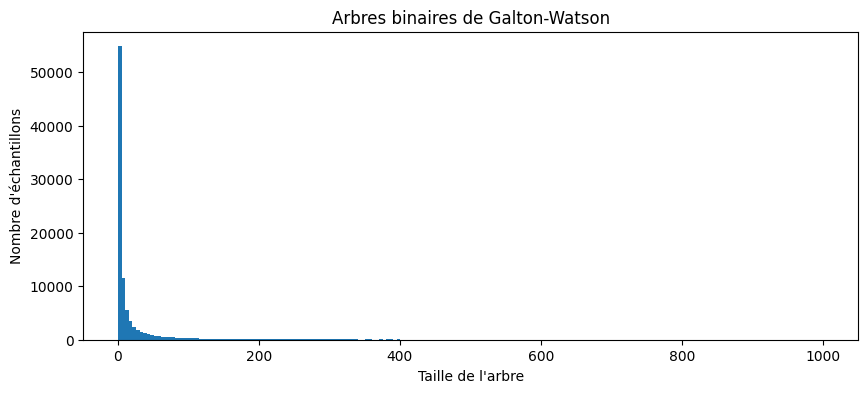

<Figure size 2000x400 with 0 Axes>

In [21]:
plt.rcParams['figure.figsize'] = [10, 4]

plt.hist(l,bins=200)
plt.title("Arbres binaires de Galton-Watson")
plt.xlabel("Taille de l'arbre")
plt.ylabel("Nombre d'échantillons")
f = plt.figure()
f.set_figwidth(20)
plt.show()

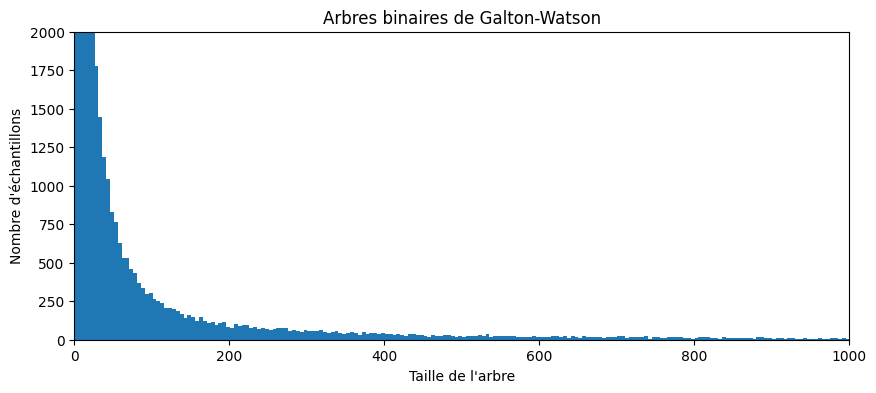

In [22]:
plt.rcParams['figure.figsize'] = [10,4]
plt.hist(l,bins=200)
plt.title("Arbres binaires de Galton-Watson")
plt.xlabel("Taille de l'arbre")
plt.ylabel("Nombre d'échantillons")
plt.axis([0, 1000, 0, 2000])
plt.show()

In [23]:
def random_binary_tree_BGW_free2(maxi): # affichage de la taille maximale d'un sous-arbre "terminé" lors du processus
    size = 0
    max_subtree_size = 0
    def random_BGW():
        nonlocal size, max_subtree_size # compteur global
        size += 1
        if size > maxi:
            raise Exception("Too large, max subtree size = " + str(max_subtree_size))
        left,sl = random_BGW() if flip_a_coin() else ([],0)
        max_subtree_size = max(max_subtree_size,sl)
        right,sr = random_BGW() if flip_a_coin() else ([],0)
        max_subtree_size = max(max_subtree_size,sr)  
        return ['z', left, right],(1+sl+sr)
    try:
        return random_BGW()
    except Exception as err:
        print(err)
        return None, 0

for _ in range(1000):
    t,s = random_binary_tree_BGW_free2(10_000)

Too large, max subtree size = 2769
Too large, max subtree size = 2842
Too large, max subtree size = 3070
Too large, max subtree size = 2733
Too large, max subtree size = 6548
Too large, max subtree size = 7500
Too large, max subtree size = 4374
Too large, max subtree size = 2836
Too large, max subtree size = 5400


### Algorithme de Devroye pour les GW contraints

In [24]:
def devroye(n):
    def aux():
        l=[]
        s, h, mini, imini = 0,0,0,0
        for i in range(n+1):
            v = 2 if flip_a_coin() else 0
            l.append(v)
            s += v
            h += -2 if v==0 else 2
            if h<mini:
                mini = h
                imini = i+1
        return s,l,imini
    
    count=0
    while(True): 
        count += 1
        s, l, imini = aux()
        if(s==n):
            #print(count)    
            return l[imini:]+l[:imini]


def genT(n):
    s = devroye(2*(n-1))
    #print(s)
    s.reverse()
    def gen():
        nonlocal s
        v = s.pop()
        if v==0:
            return ['z']
        else:
            return [gen(),gen()]
    return gen()

In [25]:
dt = genT(10)
print(dt)

[[[[[['z'], [[['z'], [['z'], ['z']]], ['z']]], ['z']], ['z']], ['z']], [['z'], ['z']]]


In [26]:
c = count_occurences(lambda : genT(3),100000)
c = count_occurences(lambda : genT(4),100000)
c = count_occurences(lambda : genT(5),1000000)

nb: 2
[[['z'], ['z']], ['z']] 49.77
[['z'], [['z'], ['z']]] 50.23
nb: 5
[[[['z'], ['z']], ['z']], ['z']] 20.05
[['z'], [[['z'], ['z']], ['z']]] 19.76
[['z'], [['z'], [['z'], ['z']]]] 19.98
[[['z'], [['z'], ['z']]], ['z']] 20.00
[[['z'], ['z']], [['z'], ['z']]] 20.21
nb: 14
[[[[['z'], ['z']], ['z']], ['z']], ['z']] 7.16
[['z'], [['z'], [['z'], [['z'], ['z']]]]] 7.16
[[[['z'], [['z'], ['z']]], ['z']], ['z']] 7.11
[[[['z'], ['z']], [['z'], ['z']]], ['z']] 7.12
[[['z'], [['z'], [['z'], ['z']]]], ['z']] 7.15
[[[['z'], ['z']], ['z']], [['z'], ['z']]] 7.17
[['z'], [[[['z'], ['z']], ['z']], ['z']]] 7.22
[[['z'], ['z']], [[['z'], ['z']], ['z']]] 7.14
[[['z'], ['z']], [['z'], [['z'], ['z']]]] 7.10
[['z'], [['z'], [[['z'], ['z']], ['z']]]] 7.12
[['z'], [[['z'], ['z']], [['z'], ['z']]]] 7.17
[[['z'], [['z'], ['z']]], [['z'], ['z']]] 7.12
[[['z'], [[['z'], ['z']], ['z']]], ['z']] 7.13
[['z'], [[['z'], [['z'], ['z']]], ['z']]] 7.13


In [29]:
import sys
sys.setrecursionlimit(100000)

In [30]:
t = time.time() 
dt = genT(100_000)
print(time.time() - t)

8.657330989837646


In [32]:
t = time.time() 
dt = genT(1_000_000)
print(time.time() - t)

184.34685826301575
